In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [37]:
#Read Data
in_data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
in_data.isnull == True

False

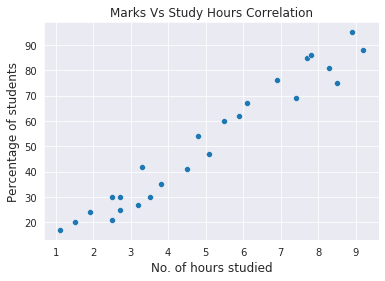

In [42]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours Correlation', size=12)
plt.ylabel('Percentage of students', size=12)
plt.xlabel('No. of hours studied', size=12)
plt.show()

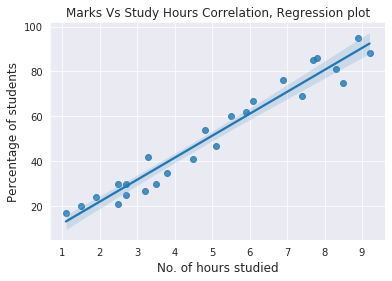

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [43]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Marks Vs Study Hours Correlation, Regression plot', size=12)
plt.ylabel('Percentage of students', size=12)
plt.xlabel('No. of hours studied', size=12)
plt.show()
print(data.corr())

In [57]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
# Spliting the Data in two
X_train, Xval, y_train, Yval = train_test_split(X, y, random_state = 0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(Xval)
pred= pd.DataFrame({'Hours': [i[0] for i in Xval], 'Predicted Marks': [k for k in y_pred]})
pred

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [51]:
compare_scores = pd.DataFrame({'Actual Percentage':Yval, 'Predicted Marks': y_pred})
compare_scores

,Actual Percentage,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


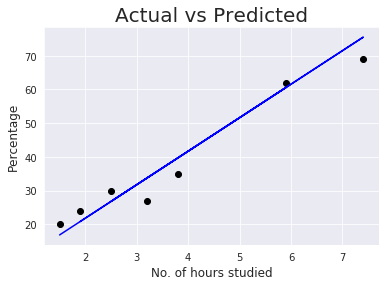

In [52]:
plt.scatter(x=Xval, y=Yval, color='Black')
plt.plot(Xval, y_pred, color='Blue')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('No. of hours studied', size=12)
plt.show()

In [53]:
#Mean Error
print('Mean Error:',mean_absolute_error(Yval,y_pred))

Mean Error: 4.130879918502482


In [55]:
#If a student studies 9,25 hours per day, then the predicted score is 
hours = [9.25]
answer = reg.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


The designed linear regression model predicts that if a student studies for 9.25 hours a day,the student is likely to score 93.89 percentage.